# Facial recognition by using Machine Learning (SVM)
By- Rhushikesh Ugemuge 

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)

['George W Bush' 'Gerhard Schroeder']
(639, 62, 47)


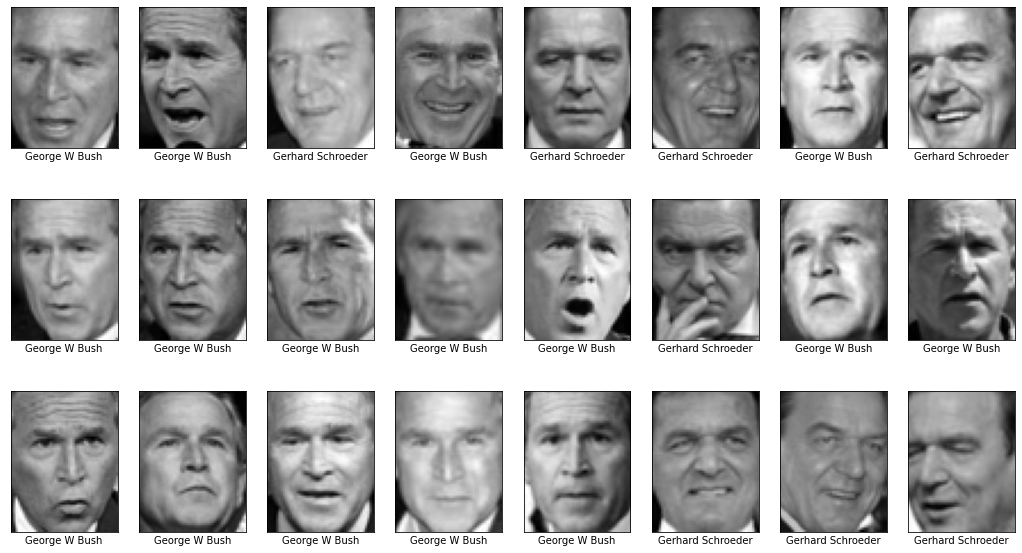

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 8, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

<AxesSubplot:>

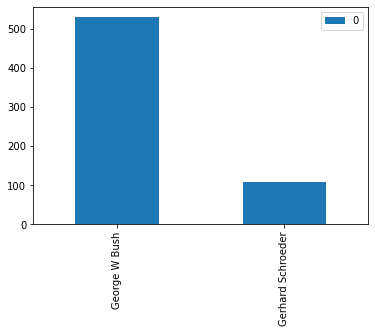

In [4]:
from collections import Counter
counts = Counter(faces.target)
names = {}

for key in counts.keys():
    names[faces.target_names[key]] = counts[key]

df = pd.DataFrame.from_dict(names, orient='index')
df.plot(kind='bar')

In [5]:
mask = np.zeros(faces.target.shape, dtype=np.bool)

for target in np.unique(faces.target):
    mask[np.where(faces.target == target)[0][:100]] = 1
    
x = faces.data[mask]
y = faces.target[mask]
x.shape

<ipython-input-5-4ac093e9b3f8>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(faces.target.shape, dtype=np.bool)


(200, 2914)

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel='linear')

grid = {
    'C': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=svc, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x, y) # Train the model with different parameters
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................................C=0.1; total time=   0.8s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ...............................................C=10; total time=   0.0s
[CV] END ........................................

0.875

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
svc = SVC(kernel='linear')
pipe = make_pipeline(scaler, svc)

grid = {
    'svc__C': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x, y)
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................................svc__C=0.1; total time=   0.0s
[CV] END .........................................svc__C=0.1; total time=   0.0s
[CV] END .........................................svc__C=0.1; total time=   0.0s
[CV] END .........................................svc__C=0.1; total time=   0.0s
[CV] END .........................................svc__C=0.1; total time=   0.0s
[CV] END ...........................................svc__C=1; total time=   0.0s
[CV] END ...........................................svc__C=1; total time=   0.0s
[CV] END ...........................................svc__C=1; total time=   0.0s
[CV] END ...........................................svc__C=1; total time=   0.0s
[CV] END ...........................................svc__C=1; total time=   0.0s
[CV] END ..........................................svc__C=10; total time=   0.0s
[CV] END ........................................

0.875

In [8]:
grid_search.best_params_

{'svc__C': 0.1}

In [9]:
scaler = StandardScaler()
svc = SVC(kernel='poly')
pipe = make_pipeline(scaler, svc)

grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.01, 0.25, 0.5, 0.75, 1],
    'svc__degree': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x, y)
grid_search.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.0s
[CV] END ..........svc__C=0.1, svc__degree=1, svc__gamma=0.5; total time=   0.0s
[CV] END ..........svc__C=0.1, svc__degree=1, 

[CV] END .........svc__C=0.1, svc__degree=5, svc__gamma=0.01; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=5, svc__gamma=0.25; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=5, svc__gamma=0.25; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=5, svc__gamma=0.25; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=5, svc__gamma=0.25; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=5, svc__gamma=0.25; total time=   0.0s
[CV] END ..........svc__C=0.1, svc__degree=5, svc__gamma=0.5; total time=   0.0s
[CV] END ..........svc__C=0.1, svc__degree=5, svc__gamma=0.5; total time=   0.0s
[CV] END ..........svc__C=0.1, svc__degree=5, svc__gamma=0.5; total time=   0.0s
[CV] END ..........svc__C=0.1, svc__degree=5, svc__gamma=0.5; total time=   0.0s
[CV] END ..........svc__C=0.1, svc__degree=5, svc__gamma=0.5; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=5, svc__gamma=0.75; total time=   0.0s
[CV] END .........svc__C=0.1

[CV] END ...........svc__C=1, svc__degree=4, svc__gamma=0.25; total time=   0.0s
[CV] END ...........svc__C=1, svc__degree=4, svc__gamma=0.25; total time=   0.0s
[CV] END ...........svc__C=1, svc__degree=4, svc__gamma=0.25; total time=   0.0s
[CV] END ...........svc__C=1, svc__degree=4, svc__gamma=0.25; total time=   0.0s
[CV] END ............svc__C=1, svc__degree=4, svc__gamma=0.5; total time=   0.0s
[CV] END ............svc__C=1, svc__degree=4, svc__gamma=0.5; total time=   0.0s
[CV] END ............svc__C=1, svc__degree=4, svc__gamma=0.5; total time=   0.0s
[CV] END ............svc__C=1, svc__degree=4, svc__gamma=0.5; total time=   0.0s
[CV] END ............svc__C=1, svc__degree=4, svc__gamma=0.5; total time=   0.0s
[CV] END ...........svc__C=1, svc__degree=4, svc__gamma=0.75; total time=   0.0s
[CV] END ...........svc__C=1, svc__degree=4, svc__gamma=0.75; total time=   0.0s
[CV] END ...........svc__C=1, svc__degree=4, svc__gamma=0.75; total time=   0.0s
[CV] END ...........svc__C=1

[CV] END ...........svc__C=10, svc__degree=3, svc__gamma=0.5; total time=   0.0s
[CV] END ...........svc__C=10, svc__degree=3, svc__gamma=0.5; total time=   0.0s
[CV] END ...........svc__C=10, svc__degree=3, svc__gamma=0.5; total time=   0.0s
[CV] END ...........svc__C=10, svc__degree=3, svc__gamma=0.5; total time=   0.0s
[CV] END ..........svc__C=10, svc__degree=3, svc__gamma=0.75; total time=   0.0s
[CV] END ..........svc__C=10, svc__degree=3, svc__gamma=0.75; total time=   0.0s
[CV] END ..........svc__C=10, svc__degree=3, svc__gamma=0.75; total time=   0.0s
[CV] END ..........svc__C=10, svc__degree=3, svc__gamma=0.75; total time=   0.0s
[CV] END ..........svc__C=10, svc__degree=3, svc__gamma=0.75; total time=   0.0s
[CV] END .............svc__C=10, svc__degree=3, svc__gamma=1; total time=   0.0s
[CV] END .............svc__C=10, svc__degree=3, svc__gamma=1; total time=   0.0s
[CV] END .............svc__C=10, svc__degree=3, svc__gamma=1; total time=   0.0s
[CV] END .............svc__C

[CV] END ..........svc__C=100, svc__degree=2, svc__gamma=0.5; total time=   0.0s
[CV] END ..........svc__C=100, svc__degree=2, svc__gamma=0.5; total time=   0.0s
[CV] END .........svc__C=100, svc__degree=2, svc__gamma=0.75; total time=   0.0s
[CV] END .........svc__C=100, svc__degree=2, svc__gamma=0.75; total time=   0.0s
[CV] END .........svc__C=100, svc__degree=2, svc__gamma=0.75; total time=   0.0s
[CV] END .........svc__C=100, svc__degree=2, svc__gamma=0.75; total time=   0.0s
[CV] END .........svc__C=100, svc__degree=2, svc__gamma=0.75; total time=   0.0s
[CV] END ............svc__C=100, svc__degree=2, svc__gamma=1; total time=   0.0s
[CV] END ............svc__C=100, svc__degree=2, svc__gamma=1; total time=   0.0s
[CV] END ............svc__C=100, svc__degree=2, svc__gamma=1; total time=   0.0s
[CV] END ............svc__C=100, svc__degree=2, svc__gamma=1; total time=   0.0s
[CV] END ............svc__C=100, svc__degree=2, svc__gamma=1; total time=   0.0s
[CV] END .........svc__C=100

0.8799999999999999

In [10]:
grid_search.best_params_

{'svc__C': 0.1, 'svc__degree': 1, 'svc__gamma': 0.01}

In [11]:
scaler = StandardScaler()
svc = SVC(kernel='rbf')
pipe = make_pipeline(scaler, svc)

grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.01, 0.25, 0.5, 0.75, 1.0]
}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x, y)
grid_search.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.0s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.0s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.0s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.0s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.0s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.0s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.0s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.0s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.0s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.0s
[CV] END .........................svc__C=0.1, svc__gamma=0.5; total time=   0.0s
[CV] END .........................svc__C=0.1, s

0.76

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=0)

In [13]:
scaler = StandardScaler()
svc = SVC(kernel='linear', C=0.1)
pipe = make_pipeline(scaler, svc)
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear'))])

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(pipe, x, y, cv=5).mean()

0.875

In [17]:
import sklearn
print(sklearn.__version__)


1.3.2


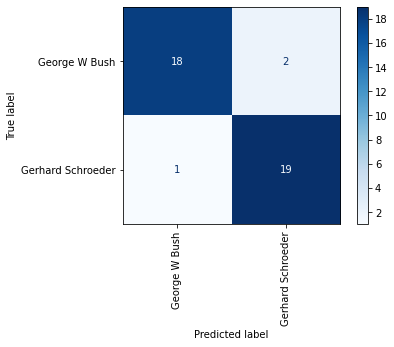

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test, display_labels=faces.target_names, cmap='Blues', xticks_rotation='vertical')